In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare Sample Data 

In [2]:

#This is the sample 2 dimensional data we are going to reduce

x = np.matrix([2.5,0.5,2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1  ])

y = np.matrix([2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9])

In [3]:
#Find mean of x and y. Then substract the means from all the values.
mean_x = np.mean(x)
mean_y = np.mean(y)

x = x-mean_x
y = y-mean_y

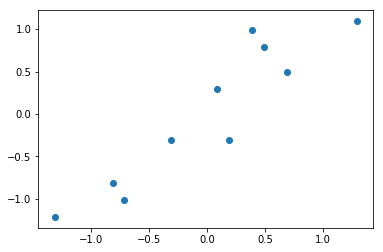

In [4]:
#Plotting X and Y values 
plt.scatter([x],[y])

# Calculate the Covariance Matrix of X and Y

In [5]:
#Calculation the covariance matrix of X and Y
data = np.r_[x,y]
cov = np.matmul(data,data.T)/(10-1)
print(cov)

[[ 0.61655556  0.61544444]
 [ 0.61544444  0.71655556]]


The diagonal values of the covariance matrix represent the variances of X and Y.
The non-diagonal values are the same and represent the covariance between X and Y

# Calculating the eigen values and eigen vectors of the covariance matrix

In [6]:
evals,evecs = np.linalg.eig(cov)

In [7]:
#Eigenvectors of symmetric matrics(Co-variance matrix is always a similar matrix) are perpendicular to each other.(Dot product is zero)
print(np.dot(evecs[:,0].T,evecs[:,1]))

[[ 0.]]


(-1.4913214767616256,
 1.4913214767616256,
 -1.6173930421976976,
 1.6173930421976976)

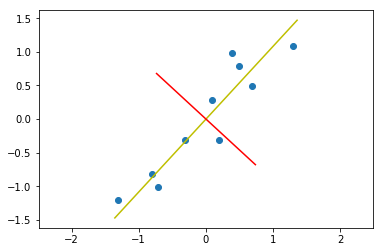

In [53]:
#Plotting the eigen vectors along with the data
#The eigen vectors have been scaled up a bit
plt.scatter([x],[y])
plt.plot([-evecs[0,1]*2,evecs[0,1]*2],[-evecs[1,1]*2,evecs[1,1]*2],'Y')
plt.plot([-evecs[0,0],evecs[0,0]],[-evecs[1,0],evecs[1,0]],'R')
plt.axis('equal')

Now we will use these eigen vectors as the "Basis Vectors" and represent the data is new co-ordinates according to these new basis vectors

In [17]:
#Change of base

inv_evecs = np.linalg.inv(evecs)


In [18]:
new_data_with_changed_basis = np.matmul(inv_evecs,data)
#reference 3blue1brown

In [19]:
#now there is no covariance between X and Y
np.cov(new_data_with_changed_basis)

array([[  4.90833989e-02,   2.77555756e-17],
       [  2.77555756e-17,   1.28402771e+00]])

(-0.39639131327037069,
 0.43094160405366166,
 -1.8636471062822892,
 1.9654260129181786)

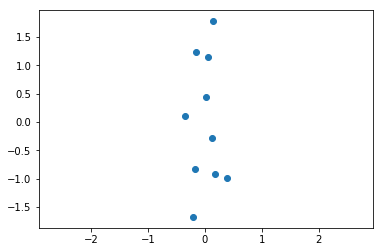

In [20]:
plt.scatter([new_data_with_changed_basis[0,:]],[new_data_with_changed_basis[1,:]])
plt.axis('equal')

In [65]:
new_data = new_data_with_changed_basis[1,:]

In [78]:
new_data = new_data.reshape(10,1)

In [79]:
new_data.shape

(10, 1)

In [84]:
retrieved_data=np.matmul(new_data,evecs[:,1].T)

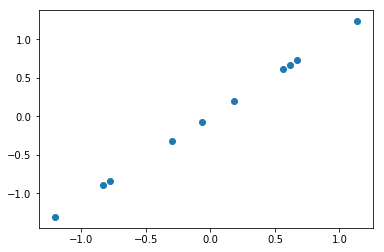

In [86]:
plt.scatter([retrieved_data[:,0]],[retrieved_data[:,1]])